<a href="https://colab.research.google.com/github/PandukaBandara99/ML-Books/blob/main/1%20Macine%20Learning%20Specialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahela Panduka Bandara ; <br> UG @ Dpt. of Electronic & Electrical Engineering ;<br> University of Peradeniya ;<br> 2023/03 <br><br> Email : e19039@end.pdn.ac.lk <br> LinkedIN : https://www.linkedin.com/in/pandukabandara/


# 1 Supervised Machine Learning: Regression




## 1.1 Introduction

In supervised learning , learn begins from given correct data set of (feature,target) and the learning algorythem is used to identify the mapping function for those data set.

*   Regression : For continuous functions ,predicts numbers.
*   Classification : Predicts caegories ,Descrete outcomes.



Terminology

*   $x$  = "Input variables , called features
*   $y$  = "Output variables" , called targets  ~ ~ ~ ~ $\hat{y}$ denotes the predicted outcomes.
*   m    = Number of training samples
*   $(x,y)$ = single training example
*   $(x^{(i)},y^{(i)})$ = $i^{th}$ example
*   







---

## 1.2 Single Variable Systems



### 1.2.1 Theory

**Model equation :** <br><br> $f_{w,b}(x) \ \ =w.X + b \ \ \ $ <br>
$\ \ \ \ \ \ \ \hat{y}^{(i)} \   = \ w.X^{(i)} + b $

**Cost Function:** <br><br>
$J_{(w,b)} \ = \ \frac{1}{2m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)})^2$ <br>
To get the best fit line ,  (w,b) for minimum  $\ J_{(w,b)} \ $ should be obtained.

**Gradient descent algorythm :** <br> <br>



```
initial random w,b
learning rate alpha

@Loop untill converges
temp_w = w - alpha * dj_dw
temp_b = b - alpha * dj_db
w,b    = temp_w,temp_b

break : if J reached its minimum value (~1% variation)

```

where, <br>

dj_dw = $ \frac{\partial J_{(w,b)}}{\partial w} \ \ \ $ and $ \ \ \ $ dj_db = $ \frac{\partial J_{(w,b)}}{\partial b}$ <br> <br>

$ \frac{\partial J_{(w,b)}}{\partial w} \ \ \  = \ \frac{1}{m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)}).X^{(i)} ------------(A)$ <br> <br>

$ \frac{\partial J_{(w,b)}}{\partial w} \ \ \  = \ \frac{1}{m} \ \sum_{i=1}^m(\hat{y}^{(i)} \ - \ y^{(i)}) --------------(B)$


**Code**

### 1.2.2 Example 01 : Housing prices




| Size (1000 sqft)    | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0                 | 250                      |
| 1.7                  | 300                      |
| 2.0                  | 480                      |
| 2.5                  | 430                      |
|3.0 |630|
|3.2| 730|

In [5]:
#Linear regression for single variable

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

''' 
Update data as requred
'''

# Initialize Training Examples
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730])

# Initial conditions for gradient descent
learning_rate = 0.01
initial_w = 1000
initial_b = 1000
number_of_iterations = 250000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.001




''' 
Do not change below
'''


# ~Data Extraction~

# Sample size (m)
m = x_train.shape[0]


'''
Cost Function
Input  : x_train , y_train , w_value , b_value ,m value
Output : Relevent cost
'''
def cost_function_for_single_variable(x,y,w,b,m):
  # y_hat = w*x[i] + b
  # y = y[i]
  # Temp variable to store the calculated data

  cost_holder = 0 

  for i in range(m):
    cost_holder += (w*x[i] + b - y[i])**2
  
  #Avoid zero devison
  if cost_holder == 0:
     cost_holder =0
  else:
    cost_holder = cost_holder/(2*m) 

  # Return the cost
  return cost_holder 


'''
Gradient Values
Input  : x_train , y_train , w_value , b_value ,m value
Output : (dj_dw,dj_db) for given (w,b)
'''

def calculate_gradient(x,y,w,b,m):

  # Temp Data holders for two returns
  temp_dj_dw = 0
  temp_dj_db = 0

  # Loop for m times (i=0 to i = m-1)
  for i in range(m):

    # Calculate dj_dw and sum According to the equation (A)
    temp_dj_dw += (w*x[i] + b - y[i])*x[i]

    # Calculate dj_db and sum According to the equation (B)
    temp_dj_db += w*x[i] + b - y[i]
  
  # Finalize the calculaion
  if(m != 0):
    temp_dj_dw = temp_dj_dw/m
    temp_dj_db = temp_dj_db/m
  else:
    temp_dj_dw = 0
    temp_dj_db = 0
  
  # return the gradients for (w,b)
  return temp_dj_dw,temp_dj_db


'''
Gradient Descent
Input  : x_train , y_train , w_initial , b_initial ,m value,learning_rate, number of iterations
Output : Best fit w,b,J_log,Parameter_log
'''

def gradient_descent():
  # Load the data & conditions to the function 
  global x_train,y_train,initial_w,initial_b,m,learning_rate,number_of_iterations

  # Store calculated J 
  J_log = []

  # Store [w,b] for each J
  Parameter_log = []
  
  #Store temp w,b
  w  = initial_w
  b  = initial_b

  # Loop for given iterations 
  for i in range(number_of_iterations):

    # Calculate gradients for w,b
    dj_dw,dj_db = calculate_gradient(x_train,y_train,w,b,m)

    #Gradient descent algorythm
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db

    # Update Logs
    if i<10000:
      J_log.append(cost_function_for_single_variable(x_train,y_train,w,b,m))
      Parameter_log.append([w,b])

    # For the stability half the samples for every 10000 iterations
    elif i % 10000 == 0:
      J_log = J_log[::2]
      Parameter_log = Parameter_log[::2]

    # Breaking when converged
    if dj_dw < learning_rate*convergence_factor and dj_db < learning_rate*convergence_factor:
      print(i)
      break

    
  return w,b,J_log,Parameter_log


 Code Explanations

*   Uses numpy , matplotlib and math libraries
*   X and Y datasets are vectoriezed using numpy.array
*   x_train.shape returns a tuple (rows,columns).So need to get the row value by using x_train.shape[0] ~ As in the example it returns (6,) => 6 
*   List item








### 1.2.3 **Data Extractions** <br>
1. Calculating the cost for a given (w,b)


In [6]:
#Calculate Cost for given w=200 and b = -100
w= 200 
b=-100
cost_Value = cost_function_for_single_variable(x_train,y_train,w, b ,m)
print(cost_Value)

9366.666666666666


2. Data Plotting the Cost Value Destribution (~Scatter)




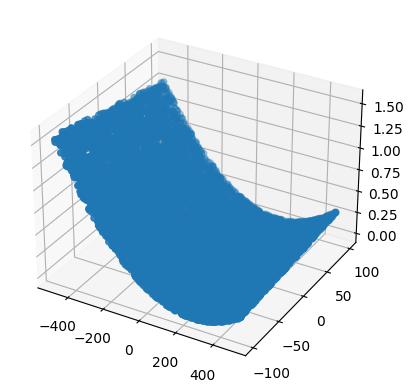

In [7]:
#Define Limits {X:w, Y:b, Z:J}
w_min = -500
w_max = 500

b_min = -100
b_max = 100

# Use Larger for a fine Values
Sample_count = 10000 ; 

# Sampling the 3d space
W_set = np.random.randint(w_min,w_max,(Sample_count,))
b_set = np.random.randint(b_min,b_max,(Sample_count,))
J_set = np.zeros(Sample_count)

# Calculating the Cost for each (w,b)
for i in range(Sample_count):
  J_set[i] = cost_function_for_single_variable(x_train,y_train,W_set[i], b_set[i] ,m)


# Visualization of the cost destribution ~ 3D scatter 

from mpl_toolkits import mplot3d
ax = plt.axes(projection = "3d")

ax.scatter(W_set,b_set,J_set)
plt.show()

#Get the minimum valued element id 
minElementID = int(np.where(J_set == np.amin(J_set))[0])

print(" The minimum vaue for the cost function is {} \n The best fit (w,b)      : ( {} , {}) \n Actual values for given : (209,2.4))".format(J_set[minElementID],W_set[minElementID],b_set[minElementID]))


In [8]:
# Since collab isn't allowing to rotate the plots,
import plotly.graph_objects as go
import numpy as np

# Helix equation
x, y, z = W_set, b_set, J_set

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='black', opacity=0.80)])
fig.show()

 The minimum vaue for the cost function is 1737.4933333333327 
 The best fit (w,b)      : ( 208 , 4) 
 Actual values for given : (209,2.4))


3. Calculating w,b using gradient descent algorythm

In [9]:
# Calculate for given data & initial conditions for Example 1.1
w_final,b_final,J_log,P_log = gradient_descent()

# Print W,b & round for 4 decimal plaecs
print("W,b values for the best fit line is :{0:10.4f} & {0:10.4f} ".format( w_final,b_final))

17376
W,b values for the best fit line is :  209.3629 &   209.3629 


In [10]:
# Plot the Convergence log


J_sample = J_log[::50]
x = np.arange(len(J_sample))

fig = go.Figure(data=go.Scatter(x=x, y=J_sample))
fig.show()

## 1.3 Multi variable system



### 1.3.1 Notation


Notation updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example matrix                  | `X_train` |   
|  $\mathbf{Y}$  | training example  targets                | `Y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 


### 1.3.2 Theory



**Training example matrix** <br>
$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  



**Parameter vector w, b**

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  



**Model Prediction With Multiple Variables** <br><br>
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector dot product



**Compute Cost With Multiple Variables**

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 




**Gradient descent for multiple variables:** <br>

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \newline \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

### 1.3.3 Example 02 : Housing Price


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [11]:
#Linear regression for multi-feature

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

''' 
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
x_train = np.array([[2104, 5, 1, 45],                         
                    [1416, 3, 2, 40],                         
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])

'''
Initial conditions for gradient descent
Use float values as initial input
'''
# Learning rate ~ Better if small
learning_rate = 5.0e-7

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 100.0, 100.0,100.0, 100.0])

# Initial value for b
initial_b =  100.0

# Larger the better <~ Automatically breaks the loop when converged! 
number_of_iterations = 1000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.00001


''' 
Do not change below
'''
# m ~ The number of examples <~~ Row count
m = x_train.shape[0]
# n ~ The number of features <~~ Column count
n = x_train.shape[1]


'''
Cost Function
Input  : x_train , y_train , w_value , b_value ,m value
Output : Relevent cost
'''
def cost_function_for_multi_variable(x,y,w,b,m):
  # y_hat = w*x[i] + b
  # y = y[i]
  # Temp variable to store the calculated data

  cost_holder = 0.0

  for i in range(m):
    cost_holder += (np.dot(x[i],w)+b-y[i])**2
  
  #Avoid zero devison
  if (cost_holder == 0.0):
    cost_holder = 0.0
  else:
    cost_holder = cost_holder/(2*m) 

  # Return the cost
  return cost_holder 

'''
Gradient Values
Input  : x_train , y_train , w_value , b_value ,m value
Output : (dj_dw,dj_db) for given (w,b)
'''

def calculate_gradient_multi(x,y,w,b,m,n):

  # Temp Data holders for two returns
  temp_dj_dw = np.zeros((n,)) # elements count equal to columns
  temp_dj_db = 0.0

  for i in range(m):
     
    Error_calculate = np.dot(x[i],w)+b-y[i]
    # Calculate dj_db 
    # Loop for m times (~ Eq to number of Rows)
    temp_dj_db  +=  Error_calculate

    #Loop for each i th set of training examples
    for j in  range(n):
      temp_dj_dw[j] += Error_calculate*x[i,j]

  
  # Finalize the calculaion
  if(m != 0):
    temp_dj_dw = temp_dj_dw/m
    temp_dj_db = temp_dj_db/m
  else:
    temp_dj_dw = 0
    temp_dj_db = 0
  
  # return the gradients for (w,b)
  return temp_dj_dw,temp_dj_db


'''
Gradient Descent
Input  : x_train , y_train , w_initial , b_initial ,m value,learning_rate, number of iterations
Output : Best fit w,b,J_log,Parameter_log
'''

def gradient_descent_multi():
  # Load the data & conditions to the function 
  global x_train,y_train,initial_w,initial_b,m,n,learning_rate,number_of_iterations

  # Store calculated J 
  J_log = []

  # Store [w,b] for each J
  Parameter_log = []
  
  #Store temp w,b
  w  = np.copy(initial_w)
  b  = initial_b

  # Comparing vector
  comparing_dj_dw_vector = learning_rate*convergence_factor*np.ones(n) 
  

  # Loop for given iterations 
  for i in range(number_of_iterations):

    # Calculate gradients for w,b
    dj_dw,dj_db = calculate_gradient_multi(x_train,y_train,w,b,m,n)

    #Gradient descent algorythm
    w -= learning_rate*dj_dw
    b -= learning_rate*dj_db

    # Update Logs
    if i<10000:
      J_log.append(cost_function_for_multi_variable(x_train,y_train,w,b,m))
      Parameter_log.append([w,b])

    # For the stability half the samples for every 10000 iterations
    elif i % 10000 == 0:
      J_log = J_log[::2]
      Parameter_log = Parameter_log[::2]
      

    # Breaking when converged
    if (dj_dw**2 < comparing_dj_dw_vector**2).all() and dj_db < learning_rate*convergence_factor:
      print(dj_dw,comparing_dj_dw_vector)
      print(dj_dw <comparing_dj_dw_vector)
      print(i)
      break
    
  return w,b,J_log,Parameter_log


**Testing**

In [12]:
#Round array elements into two decimal places when printing
np.set_printoptions(precision=2)

# Calculate for given data & initial conditions for Example 1.2.3
w_final,b_final,J_log,P_log = gradient_descent_multi()

# Print W,b 
print("W,b values for the best fit line is :{} & {} ".format( w_final,b_final))



W,b values for the best fit line is :[-2.52 99.8  99.67 92.77] & 99.77448108024004 


**Plotting the convergence**

In [13]:
# Plot the Convergence log
J_sample = J_log[::50]
x = np.arange(len(J_sample))

fig = go.Figure(data=go.Scatter(x=x, y=J_sample))
fig.show()

### 1.3.4 Feature Engineering

The algorythem in example 1.2.3 is not accurate.When the alpha and initial values are changed , the prediction accuracy changes drastically. This can be eleminated by feature scaling

Three different techniques: (There are many) 
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features , and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which we will explore below. 

In [14]:
"""
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

def zscore_normalize_features(X):

    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)



**Solve the above 1.2.4 using feature scaled example sets**

In [15]:
''' 
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
x_train = np.array([[2104, 5, 1, 45],                         
                    [1416, 3, 2, 40],                         
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.00001

'''
Feature scaling
'''
X_norm, mu, sigma = zscore_normalize_features(x_train)

x_train = X_norm

'''Run gradient descent'''


'Run gradient descent'

Test 01 :

In [16]:
'''
Initial conditions for gradient descent
Use float values as initial input
'''
# Learning rate ~ Better if small
learning_rate = 5.0e-3

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 100.0, 100.0,100.0, 100.0])

# Initial value for b
initial_b =  0.0

# Larger the better <~ Automatically breaks the loop when converged! 
number_of_iterations = 40000

#Round array elements into two decimal places when printing
np.set_printoptions(precision=2)

# Calculate for given data & initial conditions for Example 1.2.3
w_final,b_final,J_log,P_log = gradient_descent_multi()

# Print W,b 
print("W,b values for the best fit line is :{} & {} ".format( w_final,b_final))



[ 3.34e-09 -3.34e-09  4.98e-08  6.19e-09] [5.e-08 5.e-08 5.e-08 5.e-08]
[ True  True  True  True]
4298
W,b values for the best fit line is :[ 35.14  53.33 -28.93  27.67] & 289.9999998729948 


Test 2 :

## **1.3 Advanced Vectorized Multi variable system (TBD)**


Consider the above same example: 1.2.3 Housing price


| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [17]:
#Linear regression for multi-feature

#Import Required Libraries
import numpy as np
import math
import matplotlib.pyplot as plt

''' 
Update data as requred
'''
#Training Example Matrix ~ [[set 1 ], [set 2 ] , [set 3 ] ... [set m]] <~~ m is the example count
X_train = np.array([[2104, 5, 1, 45],                         
                    [1416, 3, 2, 40],                         
                    [852, 2, 1, 35]])

# Target Matrix          ~ [target_1 ,target_2 ,... , target_m ] <~~ m is the example count
y_train = np.array([460, 232, 178])



#Initial conditions for gradient descent

# Learning rate ~ Better if small
learning_rate = 0.01

# Initial w value matrix ~ [val_1 , val_2 , ... , val_n]  <~~ n is the feature count
initial_w = np.array([ 0.5, 19, -60, -42])

# Initial value for b
initial_b = 1000

# Larger the better <~ Automatically breaks the loop when converged! 
number_of_iterations = 250000

# Breaks when dw_dj and dw_db < learning_rate*convergence_factor     
# Better to use smaller values
convergence_factor = 0.001



''' 
Do not change below
'''
# m ~ The number of examples <~~ Row count
m = X_train.shape[0]
# n ~ The number of features <~~ Column count
n = X_train.shape[1]




## 1.4 Supervised Machine Learning: Classification

### 1.4.1 Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 


* Logistic regression, the model is represented as 

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model,  can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$ <br><br>
  


### 1.4.2 Cost function

  
Cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$

<br>


The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$





In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

### 1.4.3 Logistic Gradient Descent


T gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


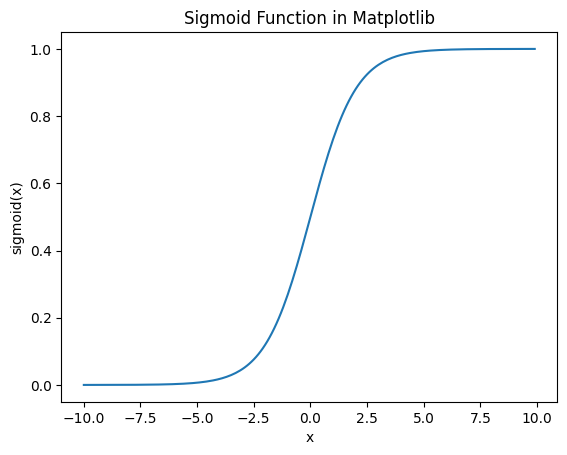

In [18]:
# Plotting the Sigmoid Function in Python with Matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

values = np.arange(-10, 10, 0.1)

plt.plot(values, sigmoid(values))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function in Matplotlib')
plt.show()

### 1.4.4 **Algorithm**

**Dataset**

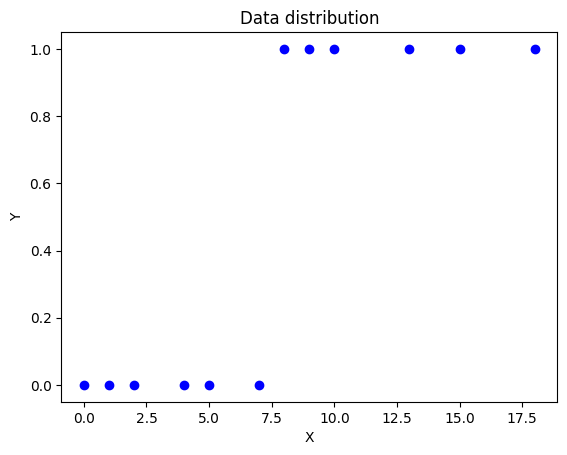

In [19]:
x_train = np.array([0,1,2,4,5,7,8,9,10,13,15,18])
y_train = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

# Plotting the data
plt.plot(x_train, y_train ,'bo')
plt.xlabel('X') #Tumor size
plt.ylabel('Y') # Is Cancerous Y = 1 , N = 0
plt.title('Data distribution')
plt.show()

In [20]:
#two feature data set
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])


#Compute the sigmoid of z
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g


#Computes cost
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

w_in = np.zeros((1))
b_in = 0


#Computes the gradient for linear regression
def compute_gradient_logistic(X, y, w, b): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

#Performs batch gradient descent
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
   
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = np.copy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


**Set 1**

In [21]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166485   
Iteration 30000: Cost 0.005672197191107651   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.00283084256010047   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35 8.15], b:-22.690605796630248


**Set 2**

**Set 1**

In [22]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 100000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 10000: Cost 0.01711604647887364   
Iteration 20000: Cost 0.008523403979166485   
Iteration 30000: Cost 0.005672197191107651   
Iteration 40000: Cost 0.004250161053834308   
Iteration 50000: Cost 0.003398230224179212   
Iteration 60000: Cost 0.00283084256010047   
Iteration 70000: Cost 0.002425848306579758   
Iteration 80000: Cost 0.0021222573122028584   
Iteration 90000: Cost 0.0018862216652143864   

updated parameters: w:[8.35 8.15], b:-22.690605796630248


## 1.5 Additional

### 1.5.1  overfitting

### 1.5.2 Regularized Cost and Gradient

#### 1.5.2.1 Cost function for regularized linear regression

The equation for the cost function regularized linear regression is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Compare this to the cost function without regularization (which you implemented in  a previous lab), which is of the form:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference is the regularization term,  <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice.

Below is an implementation of equations (1) and (2). Note that this uses a *standard pattern for this course*,   a `for loop` over all `m` examples.

In [23]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [24]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.07917239320214277


####  1.5.2.2 Cost function for regularized logistic regression
For regularized **logistic** regression, the cost function is of the form
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = sigmoid(\mathbf{w} \cdot \mathbf{x}^{(i)} + b)  \tag{4} $$ 

Compare this to the cost function without regularization (which you implemented in  a previous lab):

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right] $$

As was the case in linear regression above, the difference is the regularization term, which is    <span style="color:blue">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 

Including this term encourages gradient descent to minimize the size of the parameters. Note, in this example, the parameter $b$ is not regularized. This is standard practice. 

In [25]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = X.shape
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [26]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)

Regularized cost: 0.6850849138741673


#### 1.5.2.3  Gradient descent with regularization

The basic algorithm for running gradient descent does not change with regularization, it is:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$
Where each iteration performs simultaneous updates on $w_j$ for all $j$.

What changes with regularization is computing the gradients.


Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for both linear and logistic regression are nearly identical, differing only in computation of $f_{\mathbf{w}b}$.
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

      
* For a  <span style="color:blue"> **linear** </span> regression model  
    $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
* For a <span style="color:blue"> **logistic** </span> regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    
The term which adds regularization is  the <span style="color:blue">$\frac{\lambda}{m} w_j $</span>.

In [27]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [28]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [29]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  


In [30]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


# 2. Advanced Learning Algorithms 


## 2.1 Neural Networks

### 2.1.1 Activation of a Nuron

**Inputs :** <br> 
 > $\mathbf{X} = \begin{bmatrix} x_{1}^{(1)} & x_{1}^{(2)} & \ldots & x_{1}^{(k)} \\ x_{2}^{(1)} & x_{2}^{(2)} & \ldots & x_{2}^{(k)} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n}^{(1)} & x_{n}^{(2)} & \ldots & x_{n}^{(k)} \\ \end{bmatrix}$

**Weights:** <br>
> $\mathbf{W} = \begin{bmatrix} w_{1,1} & w_{1,2} & \ldots & w_{1,n} \\ w_{2,1} & w_{2,2} & \ldots & w_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ w_{m,1} & w_{m,2} & \ldots & w_{m,n} \\ \end{bmatrix}$

**Weighted Sum:** <br>
> $\mathbf{Z} = \mathbf{W} \cdot \mathbf{X} + \mathbf{b}$

**Activation Function:**

> $\mathbf{A} = f_{(Z)}$

**The vectorized sigmoid function:**<br>

> $\sigma_{(Z)} = \frac{1}{1 + e^{ - Z}}$

### 2.1.2 Standard Notations and Representations

Consider a simple neural network with $n$ layers, where each layer may have a different number of neurons.

> $ \begin{array}{cccc} \text{Input Layer} & \text{Hidden Layer 1} & \text{Hidden layer 2} & \text{Output Layer} \\ (n1 \times 1) & (n2 \times 1) & (n3 \times 1) & (n4 \times 1) \\ \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\  \vdots \\ \text{Neuron n1} \end{bmatrix} & \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\ \vdots \\ \text{Neuron n2} \end{bmatrix} & \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\ \vdots \\ \text{Neuron n3} \end{bmatrix} & \begin{bmatrix} \text{Neuron 1} \\ \text{Neuron 2} \\ \vdots \\ \text{Neuron n4} \end{bmatrix} \end{array} $  

**Matrix Notation:**

**Input Layer:** <br>

> $X^{(1)} = \begin{bmatrix} x_{1}^{(1)} \\ x_{2}^{(1)} \\ \vdots \\ x_{m}^{(1)} \end{bmatrix} $

**Hidden Layers** **(Layer 2 to Layer n-1):** <br> <br>

For each hidden layer $i$ from 2 to $n-1$:

> $ \mathbf{W}^{(i)} = \begin{bmatrix} w_{1,1}^{(i)} & w_{1,2}^{(i)} & \ldots & w_{1,p_i}^{(i)} \\ w_{2,1}^{(i)} & w_{2,2}^{(i)} & \ldots & w_{2,p_i}^{(i)} \\ \vdots & \vdots & \ddots & \vdots \\ w_{p_{i+1},1}^{(i)} & w_{p_{i+1},2}^{(i)} & \ldots & w_{p_{i+1},p_i}^{(i)} \\ \end{bmatrix} $
<br><br>
> $\mathbf{Z}^{(i)} = \mathbf{W}^{(i)} \cdot \mathbf{A}^{(i-1)} + \mathbf{b}^{(i)}$
<br> <br>
> $\mathbf{A}^{(i)} = g(\mathbf{Z}^{(i)})$
<br>

**Output Layer (Layer n):** <br><br>

> $W^{(n)} = \begin{bmatrix} w_{1,1}^{(n)} & w_{1,2}^{(n)} & \ldots & w_{1,p_n}^{(n)} \end{bmatrix} $ <br>

> $\mathbf{Z}^{(n)} = \mathbf{W}^{(n)} \cdot \mathbf{A}^{(n-1)} + \mathbf{b}^{(n)} $ <br>
> $\mathbf{A}^{(n)} = g(\mathbf{Z}^{(n)})$


In these equations, $\mathbf{X}^{(1)}$ represents the input column vector of shape $(m, 1)$, $\mathbf{W}^{(i)}$ represents the weight matrix of shape $(p_i, p_{i-1})$ for the $i$ th hidden layer, $\mathbf{Z}^{(i)}$ represents the weighted sum column vector of shape $(p_i, 1)$ for the $i$ th hidden layer, $\mathbf{A}^{(i)}$ represents the output column vector of shape $(p_i, 1)$ for the $i$ th hidden layer after applying the activation function $g(\cdot)$, and $\mathbf{W}^{(n)}$ represents the weight matrix of shape $(1, p_n)$ for the output layer. Finally, $\mathbf{Z}^{(n)}$ represents the weighted sum column vector of shape $(1, 1)$ for the output layer, and $\mathbf{A}^{(n)}$ represents the final output column vector of shape $(1, 1)$ after applying the activation function $g(\cdot)$.

Consider $j^{th}$ neuron of the $$l^{th}$ layer of a neuron netwok, <br>
> $a_j^{[l]}\ = \ g( \overrightarrow{w_j}^{[l]} \ \dot \ \  \overrightarrow{a}^{[l-1]} + b_j^{[l]})$

## 2.2 TensorFlow implementations


### 2.2.1 Numpy Arrays for TensorFlow

**Importing Libraries :**

In [31]:
import numpy as np
import tensorflow as tf

1. Create a 1-dimensional array:

In [32]:
a = np.array([1, 2, 3, 4, 5])
print(a)

[1 2 3 4 5]


2. Create a 2-dimensional array:

In [33]:
a = np.array([[1, 2, 3, 4, 5]])
print(a)

[[1 2 3 4 5]]


In [34]:
b = np.array([[1, 2, 3], [4, 5, 6]])
print(b)

[[1 2 3]
 [4 5 6]]


3. Create an array of zeros with a specific shape:

In [35]:
c = np.zeros((3, 4))
print(c)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


4. Create an array of ones with a specific shape:

In [36]:
d = np.ones((2, 3))
print(d)

[[1. 1. 1.]
 [1. 1. 1.]]


5. Row matrix

In [37]:
row_matrix = np.array([[1, 2, 3, 4]])
print(row_matrix)

[[1 2 3 4]]


6. Column Matrix:

In [38]:
column_matrix = np.array([[1], [2], [3], [4]])
print(column_matrix)

[[1]
 [2]
 [3]
 [4]]


### 2.2.2 Coffe Roasting 

A simple neural network using TensorFlow and Keras to identify whether coffee beans are roasted or not based on temperature and time features.

In [86]:
# First, import the necessary libraries: TensorFlow, Keras, and NumPy.
import tensorflow as tf
from tensorflow import keras
import numpy as np

'''
A sample dataset containing the features (temperature and time) and
corresponding labels (whether the coffee beans are roasted or not).
'''
# Input features (temperature and time)

features = np.array([[185.32, 12.69], [259.92, 11.87], [231.01, 14.41], [175.37, 11.72], [187.12, 14.13],
        [225.91, 12.1], [208.41, 14.18], [207.08, 14.03], [280.6, 14.23], [202.87, 12.25],
        [196.7, 13.54], [270.31, 14.6], [192.95, 15.2], [213.57, 14.28], [164.47, 11.92],
        [177.26, 15.04], [241.77, 14.9], [237.0, 13.13], [219.74, 13.87], [266.39, 13.25],
        [270.45, 13.95], [261.96, 13.49], [243.49, 12.86], [220.58, 12.36], [163.59, 11.65],
        [244.76, 13.33], [271.19, 14.84], [201.99, 15.39], [229.93, 14.56], [204.97, 12.28],
        [173.19, 12.22], [231.51, 11.95], [152.69, 14.83], [163.42, 13.3], [215.95, 13.98],
        [218.04, 15.25], [251.3, 13.8], [233.33, 13.53], [280.24, 12.41], [243.02, 13.72],
        [155.67, 12.68], [275.17, 14.64], [151.73, 12.69], [151.32, 14.81], [164.9, 11.73],
        [282.55, 13.28], [192.98, 11.7], [202.6, 12.96], [220.67, 11.53], [169.97, 12.34],
        [209.47, 12.71], [232.8, 12.64], [272.8, 15.35], [158.02, 12.34], [226.01, 14.58],
        [158.64, 12.24], [211.66, 14.17], [271.95, 14.97], [257.16, 11.71], [281.85, 13.96],
        [161.63, 12.52], [233.8, 13.04], [210.29, 14.72], [261.24, 13.69], [256.98, 13.12],
        [281.56, 13.92], [280.64, 11.68], [269.16, 13.74], [246.34, 12.27], [224.07, 12.66],
        [164.24, 11.51], [272.42, 14.18], [177.68, 12.53], [212.86, 14.77], [165.88, 15.37],
        [277.43, 12.48], [236.51, 12.94], [244.14, 11.85], [213.45, 13.85], [234.57, 14.27],
        [270.34, 12.47], [170.68, 13.06], [226.79, 15.34], [245.92, 14.45], [281.32, 12.57],
        [185.03, 13.19], [189.88, 14.1], [278.48, 12.11], [219.92, 14.21], [216.58, 15.15],
        [249.48, 15.03], [165.09, 12.28], [158.87, 14.82], [279.98, 11.56], [256.55, 14.41],
        [272.61, 12.58], [246.49, 12.45], [160.26, 14.48], [155.7, 14.3], [188.27, 13.45],
        [270.36, 12.47], [213.22, 12.92], [175.7, 13.39], [174.52, 14.7], [233.0, 12.63],
        [281.37, 12.88], [240.62, 14.43], [185.81, 11.55], [270.5, 15.33], [172.98, 12.11],
        [208.41, 13.89], [283.51, 15.35], [283.36, 12.48], [230.85, 13.24], [181.24, 11.76],
        [172.78, 12.93], [161.88, 12.1], [156.03, 13.99], [216.52, 12.47], [221.06, 13.2],
        [238.99, 15.23], [197.69, 14.08], [179.55, 15.26], [233.39, 12.13], [184.7, 12.14],
        [174.18, 12.73], [261.11, 13.33], [187.42, 13.18], [186.1, 14.43], [157.94, 12.66],
        [193.64, 12.23], [249.65, 12.22], [190.56, 11.73], [252.0, 12.96], [238.55, 12.37],
        [152.94, 12.79], [255.17, 14.85], [197.09, 14.89], [156.8, 13.59], [184.75, 13.26],
        [179.92, 15.07], [190.79, 15.28], [164.73, 13.22], [209.87, 14.34], [196.58, 13.47],
        [159.51, 12.74], [247.87, 11.92], [212.44, 12.45], [172.34, 11.99], [259.87, 14.25],
        [201.23, 13.07], [248.34, 13.92], [273.66, 15.18], [215.09, 14.14], [223.53, 12.74],
        [211.22, 14.38], [224.61, 14.03], [215.75, 15.31], [254.82, 12.02], [259.9, 15.17],
        [260.25, 12.87], [199.67, 12.47], [157.52, 13.39], [264.81, 14.58], [239.4, 14.89],
        [238.98, 12.39], [258.43, 12.97], [270.16, 12.81], [162.41, 14.42], [164.53, 14.98],
        [205.61, 14.62], [157.1, 13.68], [241.38, 12.02], [232.13, 12.07], [191.04, 12.96],
        [233.64, 12.02], [174.95, 14.63], [246.64, 13.32], [188.07, 14.27], [213.16, 12.75],
        [268.08, 12.31], [258.58, 13.97], [237.21, 14.23], [251.02, 15.02], [274.28, 12.52],
        [172.12, 15.09], [177.52, 12.39], [258.71, 15.36], [264.01, 13.57], [200.71, 15.45],
        [249.37, 14.02], [151.5, 12.28], [151.82, 15.13], [181.92, 12.18], [228.65, 12.31],
        [223.78, 15.3], [266.63, 12.48], [273.68, 13.1], [220.61, 12.8], [284.99, 12.73]])
features = features.reshape((200,2))
# Output labels (roasted or not roasted)
labels = np.array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0.])



In [101]:

'''
Before training the neural network, its better to preprocess the data. 
In this case, normalize the feature values to a range between 0 and 1.
'''
# Normalize feature values
features = features / np.amax(features, axis=0)

'''
Build the neural network model using Keras. For simplicity,
create a basic feedforward network with two dense layers.

In this example, there are two input features (temperature and time),
so the input shape for the first layer is (2,). 
The first dense layer consists of 10 neurons with the sigmoid activation function, 
and the final dense layer has 1 neuron with the sigmoid activation 
function to produce a binary output.
'''

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(2,), activation='sigmoid',name = 'layer1'),
    keras.layers.Dense(1, activation='sigmoid',name = 'layer2')
])

#Compile and train the model using the dataset.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(features, labels, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 0.6982 - accuracy: 0.2150
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.6600
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.7850
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.7850
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.7850
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.7850
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.7850
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.7850
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.7850
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.7850
Epoch 11/50
7/7 [======================

In [102]:
#Make predictions using the trained model on new, unseen data.
new_data = np.array([[200, 13.9], [200, 17]])

# Normalize new data
new_data = new_data / np.amax(features, axis=0)

# Make predictions
predictions = model.predict(new_data)
print(predictions)


1/1 [==============================] - 0s 52ms/step
[[0.25]
 [0.25]]


In [103]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[0.]
 [0.]]


In [104]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 0.52  0.22  1.15]
 [ 0.34  0.31 -0.35]] 
b1: [ 0.25 -0.23  0.3 ]
W2:
 [[-0.89]
 [ 0.42]
 [-0.38]] 
b2: [-0.24]


# 3. Unsupervised Learning, Recommenders, Reinforcement Learning

## 3.1 Unsupervised Learning

Unsupervised learning is a category of machine learning where the goal is to discover patterns, structures, or relationships in a dataset without explicit target labels. Unlike supervised learning, where the algorithm learns from labeled examples to make predictions or classifications, unsupervised learning focuses on finding underlying patterns or representations within the data.

The main objective of unsupervised learning is to explore the inherent structure of the data and extract meaningful insights without any prior knowledge or guidance. It is often used for exploratory data analysis, data preprocessing, dimensionality reduction, and clustering.

There are two primary types of unsupervised learning techniques:

1. Clustering: Clustering algorithms group similar data points together based on their inherent similarities or distances in the feature space. The algorithms aim to identify distinct groups or clusters within the data, allowing us to gain insights into natural groupings or patterns. Common clustering algorithms include K-means, hierarchical clustering, and DBSCAN.

2. Dimensionality Reduction: Dimensionality reduction techniques aim to reduce the number of features or variables in a dataset while preserving important information. They help overcome the curse of dimensionality and simplify complex data representations. Principal Component Analysis (PCA) and t-SNE (t-Distributed Stochastic Neighbor Embedding) are popular dimensionality reduction methods.

Unsupervised learning has various real-world applications. For instance:

- Customer Segmentation: Clustering algorithms can group customers with similar behavior or preferences for targeted marketing campaigns.
- Anomaly Detection: Unsupervised learning can help identify unusual or anomalous data points that deviate from the norm, such as detecting fraud in financial transactions or detecting faults in industrial processes.
- Recommendation Systems: Collaborative filtering is an unsupervised learning approach used in recommender systems to suggest relevant items based on user behavior and preferences.
- Data Visualization: Dimensionality reduction techniques enable visualizing high-dimensional data in lower dimensions, aiding in data exploration and pattern discovery.


## 3.2 Clustering

### 3.2.1 Popular Clustering Algorithms



| Algorithm        | Explanation           | Pros  | Cons  |
| ------------- |-------------| -----| -----|
| K-means      | Divides data into predefined number of <br> clusters by minimizing the within-cluster<br> sum of squares. | - Simple and computationally efficient.<br>- Scales well to large datasets.<br>- Easy to interpret results.<br>- Works well with spherical clusters. | - Requires the number of clusters to be specified in advance.<br>- Sensitive to initialization and can get stuck in local optima.<br>- Assumes clusters with similar sizes and variances. |
| Hierarchical Clustering      | Builds a hierarchy of clusters by either <br>agglomerative (bottom-up) or divisive <br>(top-down) approach. | - Does not require the number of clusters to be specified in advance.<br>- Provides a dendrogram for visual interpretation.<br>- Can capture clusters at different scales. | - Computationally expensive for large datasets.<br>- Difficult to interpret for a large number of data points.<br>- Sensitive to the choice of distance metric and linkage method. |
| DBSCAN (Density-Based <br> Spatial Clustering of <br> Applications with Noise) | Groups together data points that are <br> densely connected, forming dense regions<br> separated by sparser areas. | - Does not require the number of clusters to be specified in advance.<br>- Can discover clusters of arbitrary shape.<br>- Robust to outliers and noise.<br>- Does not assume clusters with similar sizes or densities. | - Requires tuning of distance and density parameters.<br>- Can struggle with datasets of varying densities or high-dimensional data.<br>- Not suitable for clusters with varying densities. |
| Gaussian Mixture Models <br>(GMM) | Represents each cluster as a probability <br>distribution modeled by a mixture of Gaussian<br> distributions. | - Can capture complex cluster shapes and handle overlapping clusters.<br>- Provides probabilistic assignments to data points.<br>- Can estimate missing or incomplete data using the expectation-maximization algorithm. | - Requires the number of components or clusters to be specified in advance.<br>- Sensitive to the initialization of parameters.<br>- Computationally expensive for large datasets.<br>- Converges to local optima. |


### 3.2.2 K-Means Algorithm 

Certainly! The k-means algorithm is an iterative clustering algorithm that aims to partition a given dataset into k distinct clusters. 
 
**k-means algorithm workflow:**

> 1. Initialization:
>    - Choose the number of clusters, k, that  want to identify in the dataset.
>    - Randomly initialize k cluster centroids as the initial positions of the cluster centers.
>
> 2. Assignment Step:
>    - For each data point in the dataset, calculate the distance to each of the k cluster centroids.
>    - Assign the data point to the cluster with the nearest centroid, forming k clusters.
> 
> 3. Update Step:
>    - Recalculate the cluster centroids by taking the mean of all data points assigned to each cluster.
>    - The new centroid positions represent the updated cluster centers.
>
> 4. Repeat Steps 2 and 3:
>    - Iterate the assignment step and the update step until convergence is achieved.
>    - Convergence occurs when the cluster assignments no longer change significantly or a maximum number of iterations is reached.
>
> 5. Final Result:
>    - The algorithm converges to a final set of cluster centroids that represent the centers of the clusters.
>    - Each data point is assigned to the cluster whose centroid it is closest to.
>



The k-means algorithm is a popular unsupervised learning method used for clustering data into k distinct groups. In this note, we will discuss the mathematical representations of the k-means algorithm, including notations, the algorithm, and the cost function.<br>

**Notations :**
1. **$c^{(i)}$**  : Index of the cluster to which the training example $x^{(i)}$ is currently assigned.
2. **$\mu_k$** : Cluster centroid k.
3. **$\mu_c(i)$** Cluster centroid of cluster whichthe training example $x^{(i)}$ is aasigned

**Algorithm Overview**

The k-means algorithm can be summarized as follows:

> 1. item Initialize the centroids: randomly select $k$ data points as the initial centroids.
> 2. item Assign each data point to the nearest centroid based on a distance metric (commonly Euclidean distance).
>3. item Update the centroids by computing the mean of all data points assigned to each centroid.
>4. item Repeat steps 2 and 3 until convergence (i.e., when the centroids no longer change significantly or after a certain number of iterations).

**Cost Function**

The cost function of the k-means algorithm, also known as the distortion or within-cluster sum of squares (WCSS), measures the quality of the clustering solution. It is defined as the sum of the squared Euclidean distances between each data point and its assigned centroid: <br>

$
J(c^{(i)},...,c^{(m)},\mu_1,...,\mu_k) =\frac{1}{m} \sum_{i=1}^{m}  \|x^{(i)} - \mu_c(i)\|^2
$  


The goal of the k-means algorithm is to minimize the cost function by finding the optimal cluster assignments and centroids.




####3.2.2.1 Initializing the K


> 1. **Elbow Method:**
> The Elbow Method is a commonly used approach to estimate the optimal value of k. It involves plotting the within-cluster sum of squares (WCSS) against different values of k. WCSS represents the sum of squared distances between each data point and the centroid of its assigned cluster. The idea is to select the value of k where the WCSS decreases significantly and starts to level off. This "elbow" point indicates a good trade-off between the number of clusters and the compactness of the clusters.
>
> 2. **Silhouette Score:**
> The Silhouette score is a metric that measures the quality of clustering. It evaluates how well each data point fits within its assigned cluster compared to other clusters. For different values of k, calculate the average Silhouette score across all data points. The value of k that maximizes the Silhouette score indicates better-defined and well-separated clusters. Higher Silhouette scores imply more distinct and accurate clustering.
>
> 3. **Gap Statistic:**
> The Gap Statistic method compares the within-cluster dispersion for different values of k to a reference null distribution. It calculates the gap between the observed within-cluster dispersion and the expected dispersion under the null distribution. The optimal value of k corresponds to the largest gap. This method helps identify the value of k that yields clusters with greater separation and coherence.
> 
> 4. **Domain Knowledge:**
> Leverage any domain knowledge or prior understanding of the data to guide the selection of k. Consider any known natural groupings or expected number of clusters based on the specific characteristics of the data. Expert knowledge can provide valuable insights and initial estimates for choosing the appropriate value of k.
>
> 5. **Visualization:**
> Visualize the data and resulting clusters for different values of k. Utilize scatter plots, heatmaps, or other suitable visualizations to assess the quality and interpretability of the clusters. Look for a value of k that creates meaningful and distinct clusters without excessive overlap or mixing. Visual inspection can provide valuable intuition about the optimal number of clusters.
>
> 6. **Cross-Validation:**
> Split the dataset into training and validation subsets. Apply the k-means algorithm with different values of k to the training data and evaluate the clustering performance on the validation set using appropriate metrics (e.g., accuracy, F-measure, etc.). Choose the value of k that yields the best performance on the validation set. Cross-validation helps assess the stability and generalizability of the clustering results.
>
> 7. **Computational Constraints:**
> Consider any computational constraints or limitations, such as the size of the dataset and available computing resources. Larger values of k significantly increase the computational complexity and runtime. Take into account the trade-off between the desired level of clustering granularity and computational feasibility.


#### 3.2.2.2 Random Initialization

> 1. **Define the Number of Clusters (k):**
> Before selecting random data points as initial centroids, determine the desired number of clusters (k) for the dataset. 
>
> 2. **Set the Random Seed:**
> To ensure reproducibility, set a random seed before selecting random data points. This ensures that the same set of random numbers is generated each time the initialization process is run. Setting the random seed allows for consistent comparisons and analysis of different initializations.
>
> 3. **Randomly Sample Data Points:**
> Randomly sample k data points from the dataset to serve as initial centroids. It is important to ensure that the selected points are distinct and cover the range of variability in the data. One common approach is to use a random sampling method without replacement to ensure each data point is selected only once.
>
> 4. **Ensure Coverage of Feature Space:**
> Check if the randomly selected data points adequately cover the feature space. The centroids should span the entire range of values for each feature or variable. If the initial selection does not provide sufficient coverage, repeat the random sampling step until satisfactory coverage is achieved.
>
> 5. **Assign Random Data Points as Centroids:**
> Assign the randomly selected data points as the initial centroids for the k-means algorithm. Each data point represents the center of its respective cluster at the start of the clustering process.




```python
# Random Initialization Psudo Code

for i = 1 to requiredIterations
{
  Randomly initialize K-means for k examples
  Run K-means
  Compute the cost function
  get the centroids which has the minimum cost function
}
```



#### Gaussian Distribution (normal)

The equation for a Gaussian distribution, also known as the normal distribution, is given by:

$ P(x) = \frac{1}{{\sigma \sqrt{2\pi}}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $


To calculate the standard deviation $\sigma$ of a set of data points, 

$ \sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}} $

where:
> - $x_i$ represents the individual data points.
> - $\mu$ represents the mean of the data points.
> - $ n $ represents the total number of data points.


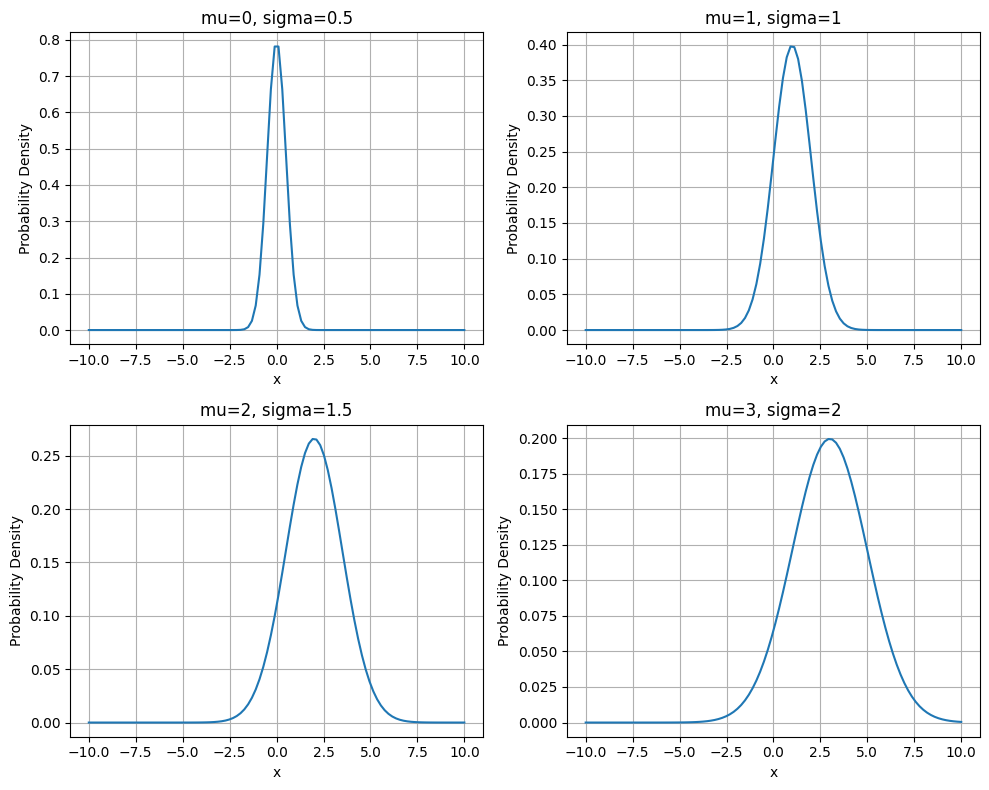

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-10, 10, 100)

# Define the parameters for the four subplots
mu_values = [0, 1, 2, 3]
sigma_values = [0.5, 1, 1.5, 2]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the subplots and plot the corresponding Gaussian distribution
for i in range(2):
    for j in range(2):
        mu = mu_values[i * 2 + j]
        sigma = sigma_values[i * 2 + j]
        
        # Calculate the corresponding y values using the Gaussian equation
        y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))
        
        # Plot the Gaussian distribution in the current subplot
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f'mu={mu}, sigma={sigma}')
        axs[i, j].set_xlabel('x')
        axs[i, j].set_ylabel('Probability Density')
        axs[i, j].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


####  3.2.2.4 Anomaly detection

Anomaly detection in the k-means algorithm involves identifying data points that deviate significantly from the established clusters. Although k-means is primarily designed for clustering, it can be adapted for anomaly detection by considering data points that do not belong to any cluster or have a high dissimilarity with their assigned cluster centroid.

**Multi-Dimensional Analysis** <br>
let the feature $\overrightarrow{x}^{(i)}$, <br>
$\overrightarrow{x}^{(i)}$   = $
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}$ <br>

Then the probability of $\overrightarrow{x}^{(i)}$ ,<br>
$P(\overrightarrow{x}^{(i)})\ \ \ = \ \ P(x_1\ \ ; \mu_1,\sigma^2_1) \ \times \ P(x_2\ \ ; \mu_2,\sigma^2_2) \ \times \ ... \times \ P(x_n\ \ ; \mu_n,\sigma^2_n)$ 

**Anomaly Detection Algorithm**


> 1. Choose $n$ features $x_i$ thatmight be indicative of anomalous examples. Let the sample count is $m$ <br>
> $\begin{bmatrix} x_1^{(1)} & x_1^{(2)} & \ldots & x_1^{(m)} \\ x_{2}^{(1)} & x_{2}^{(2)} & \ldots & x_{2}^{(m)} \\ \vdots & \vdots & \ddots & \vdots \\ x_{n}^{(1)} & x_{n}^{(2)} & \ldots & x_{n}^{(m)} \end{bmatrix}$
>
> 2. Calculate $\mu_1....\mu_n,\sigma_1^2...\sigma_n^2$<br> <br>
> $\overrightarrow{\mu} = \frac{1}{m} {\sum_{i=1}^{m}}\overrightarrow{x}^{(i)}$ <br><br>
> $\overrightarrow{\sigma^2} = \frac{1}{m} {\sum_{i=1}^{m}}(\overrightarrow{x}^{(i)} - \overrightarrow{\mu})^2$ <br>
> 3. For given new dataset calculate $P(\overrightarrow{x}^{(i)})$

If $P(\overrightarrow{x}^{(i)})  \  < \epsilon$   then $\overrightarrow{x}^{(i)} $ is an anomaly. <br>
The $\epsilon$ can be decided by using a cross validation test.(Train the model using known non-anomaly data set and small known anomaly dataset)


#### 3.2.2.5 Anomaly detection vs Supervised Learning



| Aspect                       | Anomaly Detection                                                | Supervised Learning                                             |
| ---------------------------- | --------------------------------------------------------------- | --------------------------------------------------------------- |
| Objective                    | Identify rare and unusual instances in a dataset                | Predict the target variable/class based on labeled training data |
| Training Data                | Contains both normal and anomalous instances                    | Labeled instances representing different classes/labels         |
| Labeling Requirement         | Anomalies are often unlabeled and need to be identified          | Requires labeled instances for each class/label                 |
| Algorithm Complexity         | Relies on various algorithms, such as statistical or clustering  | Utilizes algorithms like decision trees, SVM, neural networks    |
| Class Imbalance              | Deals with imbalanced datasets where anomalies are rare         | Can handle class imbalance through sampling techniques          |
| Performance Evaluation       | Metrics like precision, recall, F1-score, AUC-ROC are used      | Metrics like accuracy, precision, recall, F1-score are used     |
| Training Data Availability   | Anomalies can be difficult to obtain and represent real cases    | Requires labeled training data for all classes/labels           |
| Generalizability             | Can adapt to new anomalies or previously unseen patterns        | Performs well on similar instances to the training data         |
| Interpretability             | Often provides insights into unusual instances or system issues | Can provide explanations through feature importance             |
| Applicability                | Useful for fraud detection, intrusion detection, system monitoring, etc. | Applicable to a wide range of classification and regression tasks |
| Data Requirements            | Requires a representative sample of anomalies in the dataset    | Requires a sufficient number of labeled instances for each class |
| Scalability                  | Can handle large-scale datasets but may be computationally intensive | Scalable with efficient algorithms and parallel computing      |


#### 3.2.2.6 Feature Selection for Anomaly Detection

When the destribution of the feature is skewed (Positively or negetively) ,Transform it to the log scale.  $x → log(x+k)$ <br>
Or else do other feature scalings and feature combining.

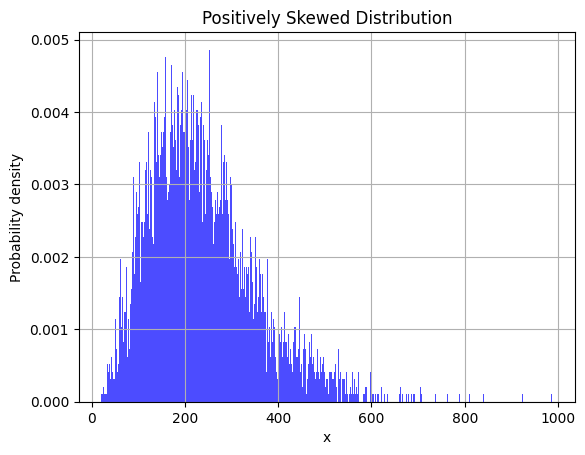

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the positively skewed distribution
mean = 6.0
std_dev = 1.0

# Generate dataset from the positively skewed distribution
data = np.random.normal(mean, std_dev, 5000)
data = np.power(data, 3)  # Apply cube function for positive skewness

# Plot the positively skewed distribution
plt.hist(data, bins=500, density=True, alpha=0.7, color='blue')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Positively Skewed Distribution')
plt.grid(True)
plt.show()


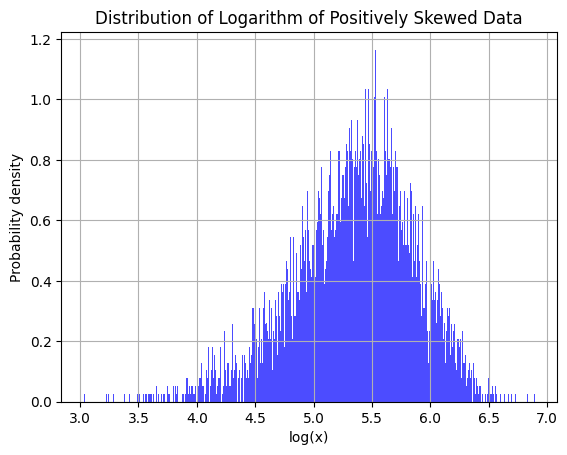

In [41]:
# Apply logarithm to the data
log_data = np.log(data)

# Plot the distribution of the logarithm of the data
plt.hist(log_data, bins=500, density=True, alpha=0.7, color='blue')
plt.xlabel('log(x)')
plt.ylabel('Probability density')
plt.title('Distribution of Logarithm of Positively Skewed Data')
plt.grid(True)
plt.show()
